In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm
sns.set()

# Question 1

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22,4/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,177803,177827,177897,177932,177974,177974,177974,177974,177974,178141
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,273823,273870,273913,274000,274055,274108,274136,274191,274219,274219
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265684,265691,265694,265699,265705,265707,265714,265720,265724,265727
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40328,40328,40328,40328,40328
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194


In [4]:
new_df = df.loc[df['Country/Region']=='Singapore']
singa_df = new_df.drop(['Province/State','Country/Region','Lat','Long','1/22/20'], axis=1)
singa_df

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22,4/11/22
231,1,3,3,4,5,7,7,10,13,16,...,1106001,1109744,1109744,1119419,1123886,1128155,1132169,1135428,1138001,1140569


In [5]:
singa = singa_df.T
new = singa.rename({231:'Yt'},axis=1)

new['Yt1'] = singa.shift(1)
new['Yt2'] = singa.shift(2)
new['Yt3'] = singa.shift(3)
new['Yt4'] = singa.shift(4)
new['Yt5'] = singa.shift(5)
new= new.fillna(0)
new

,Yt,Yt1,Yt2,Yt3,Yt4,Yt5
1/23/20,1,0.0,0.0,0.0,0.0,0.0
1/24/20,3,1.0,0.0,0.0,0.0,0.0
1/25/20,3,3.0,1.0,0.0,0.0,0.0
1/26/20,4,3.0,3.0,1.0,0.0,0.0
1/27/20,5,4.0,3.0,3.0,1.0,0.0
...,...,...,...,...,...,...
4/7/22,1128155,1123886.0,1119419.0,1109744.0,1109744.0,1106001.0
4/8/22,1132169,1128155.0,1123886.0,1119419.0,1109744.0,1109744.0
4/9/22,1135428,1132169.0,1128155.0,1123886.0,1119419.0,1109744.0
4/10/22,1138001,1135428.0,1132169.0,1128155.0,1123886.0,1119419.0


In [6]:
new5 = new.iloc[0:6,:]
new5

,Yt,Yt1,Yt2,Yt3,Yt4,Yt5
1/23/20,1,0.0,0.0,0.0,0.0,0.0
1/24/20,3,1.0,0.0,0.0,0.0,0.0
1/25/20,3,3.0,1.0,0.0,0.0,0.0
1/26/20,4,3.0,3.0,1.0,0.0,0.0
1/27/20,5,4.0,3.0,3.0,1.0,0.0
1/28/20,7,5.0,4.0,3.0,3.0,1.0


In [7]:
lag_model = smf.ols('Yt~ Yt1+Yt2+Yt3+Yt4+Yt5', data=new5).fit()
print(lag_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Yt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 12 Apr 2022   Prob (F-statistic):                nan
Time:                        17:02:03   Log-Likelihood:                 182.64
No. Observations:                   6   AIC:                            -353.3
Df Residuals:                       0   BIC:                            -354.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000        inf          0        n

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


## interpret coefficients
The coefficients for the model are 2, -4, 9, -19 and 42. 
The coefficient of Yt1 is 2 and it means that the estimated expected 2 case increase in the daily case count for a 1 case increase in the previous day holding the number of cases in the 2-day, 3-day,4-day and 5-day previous case count fixed. 

The coefficient of Yt2 is -4 and it means that the estimated expected 4 case decrease in the daily case count for a 1 case increase in the 2-day previous case count holding the number of cases in the 1-day, 3-day,4-day and 5-day previous case count fixed.

The coefficient of Yt3 is 9 and it means that the estimated expected 9 case increase in the daily case count for a 1 case increase in the 3-day previous case count holding the number of cases in the 1-day, 2-day,4-day and 5-day previous case count fixed.

The coefficient of Yt4 is -19 and it means that the estimated expected 19 case decrease in the daily case count for a 1 case increase in the 4-day previous case count holding the number of cases in the 1-day, 2-day,3-day and 5-day previous case count fixed.

The coefficient of Yt5 is 42 and it means that the estimated expected 42 case increase in the daily case count for a 1 case increase in the 5-day previous case count holding the number of cases in the 1-day, 2-day, 3-day, and 4-day previous case count fixed.

Intercept is 1 meaning that the average daily case count is 1 when the number of cases in the 1-day, 2-day,3-day, 4-day and 5-day previous case count is equal to zero. 

# Question 2

## Part a

In [8]:
df2 = singa.rename({231:'Yt'},axis=1)

In [9]:
for i in range(len(singa_df.columns)):
    df2['Yt'+'{}'.format(i)]= singa.shift(i)

In [10]:
df2 = df2.fillna(0)
df2 = df2.drop(['Yt0'],axis=1)
df2 = df2.assign(days=range(len(df2.index)))

In [11]:
df2

,Yt,Yt1,Yt2,Yt3,Yt4,Yt5,Yt6,Yt7,Yt8,Yt9,...,Yt801,Yt802,Yt803,Yt804,Yt805,Yt806,Yt807,Yt808,Yt809,days
1/23/20,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1/24/20,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1/25/20,3,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1/26/20,4,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1/27/20,5,4.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/7/22,1128155,1123886.0,1119419.0,1109744.0,1109744.0,1106001.0,1101438.0,1096428.0,1090823.0,1085094.0,...,5.0,4.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,805
4/8/22,1132169,1128155.0,1123886.0,1119419.0,1109744.0,1109744.0,1106001.0,1101438.0,1096428.0,1090823.0,...,7.0,5.0,4.0,3.0,3.0,1.0,0.0,0.0,0.0,806
4/9/22,1135428,1132169.0,1128155.0,1123886.0,1119419.0,1109744.0,1109744.0,1106001.0,1101438.0,1096428.0,...,7.0,7.0,5.0,4.0,3.0,3.0,1.0,0.0,0.0,807
4/10/22,1138001,1135428.0,1132169.0,1128155.0,1123886.0,1119419.0,1109744.0,1109744.0,1106001.0,1101438.0,...,10.0,7.0,7.0,5.0,4.0,3.0,3.0,1.0,0.0,808


In [12]:
X = df2.iloc[:,1:810]
Y = df2.Yt

In [13]:
clfa = LinearRegression().fit(X,Y)
Yhat = clfa.predict(X)

Text(0, 0.5, 'Prediction Error')

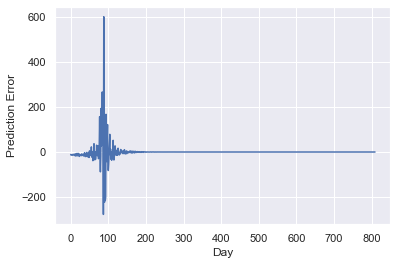

In [14]:
plt.plot(df2['days'],Y-Yhat)  # Y is the outcome and Yhat is the predicted outcome
plt.xlabel('Day')
plt.ylabel('Prediction Error')

## part b

In [15]:
Xb = df2.iloc[0:406,1:406]  # half of the time for A

In [16]:
Xb

,Yt1,Yt2,Yt3,Yt4,Yt5,Yt6,Yt7,Yt8,Yt9,Yt10,...,Yt396,Yt397,Yt398,Yt399,Yt400,Yt401,Yt402,Yt403,Yt404,Yt405
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/27/20,4.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/27/21,59913.0,59900.0,59890.0,59883.0,59879.0,59869.0,59858.0,59846.0,59832.0,59821.0,...,7.0,5.0,4.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0
2/28/21,59925.0,59913.0,59900.0,59890.0,59883.0,59879.0,59869.0,59858.0,59846.0,59832.0,...,7.0,7.0,5.0,4.0,3.0,3.0,1.0,0.0,0.0,0.0
3/1/21,59936.0,59925.0,59913.0,59900.0,59890.0,59883.0,59879.0,59869.0,59858.0,59846.0,...,10.0,7.0,7.0,5.0,4.0,3.0,3.0,1.0,0.0,0.0
3/2/21,59948.0,59936.0,59925.0,59913.0,59900.0,59890.0,59883.0,59879.0,59869.0,59858.0,...,13.0,10.0,7.0,7.0,5.0,4.0,3.0,3.0,1.0,0.0


In [17]:
Yb = df2.iloc[0:406,0]
Yb

1/23/20        1
1/24/20        3
1/25/20        3
1/26/20        4
1/27/20        5
           ...  
2/27/21    59925
2/28/21    59936
3/1/21     59948
3/2/21     59956
3/3/21     59979
Name: Yt, Length: 406, dtype: int64

In [18]:
Xa = df2.iloc[:,1:406]      #Xa and Ya are all of A
Ya = df2.iloc[:,0]

In [19]:
clfb = LinearRegression().fit(Xb,Yb)

In [20]:
Yhat1 = clfb.predict(Xa)   # Yhat1 is the predicted outcome 

Text(0, 0.5, 'Forecasting Error')

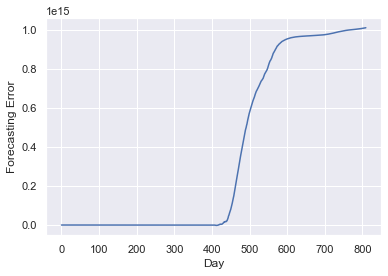

In [21]:
plt.plot(df2['days'],Ya-Yhat1)
plt.xlabel('Day')
plt.ylabel('Forecasting Error')

# Question 3

In [22]:
# B country is Albania
dfB = df.loc[df['Country/Region']=='Albania']
dfB1 = dfB.drop(['Province/State','Country/Region','Lat','Long','1/22/20'], axis=1)
dfB2= dfB1.T
dfB3 = dfB2.rename({1:'Yt'},axis=1)

In [23]:
for i in range(len(dfB1.columns)):
    dfB3['Yt'+'{}'.format(i)]= dfB2.shift(i)

In [24]:
dfB3 = dfB3.fillna(0)
dfB3 = dfB3.drop(['Yt0'],axis=1)
dfB3 = dfB3.assign(days=range(len(dfB3.index)))

In [25]:
dfB3

,Yt,Yt1,Yt2,Yt3,Yt4,Yt5,Yt6,Yt7,Yt8,Yt9,...,Yt801,Yt802,Yt803,Yt804,Yt805,Yt806,Yt807,Yt808,Yt809,days
1/23/20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1/24/20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1/25/20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1/26/20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1/27/20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/7/22,274108,274055.0,274000.0,273913.0,273870.0,273823.0,273759.0,273677.0,273608.0,273529.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,805
4/8/22,274136,274108.0,274055.0,274000.0,273913.0,273870.0,273823.0,273759.0,273677.0,273608.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,806
4/9/22,274191,274136.0,274108.0,274055.0,274000.0,273913.0,273870.0,273823.0,273759.0,273677.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,807
4/10/22,274219,274191.0,274136.0,274108.0,274055.0,274000.0,273913.0,273870.0,273823.0,273759.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,808


In [26]:
# Fit the model using data from country A which is Singapore
XA= df2.iloc[:,1:810]
YA = df2.Yt
clf3 = LinearRegression().fit(XA,YA)

In [27]:
# Get the data from country B 
XB = dfB3.iloc[:,1:810]
YB = dfB3.Yt

In [28]:
YhatB = clf3.predict(XB)  # predicted outcome for country B

Text(0, 0.5, 'Sample Error')

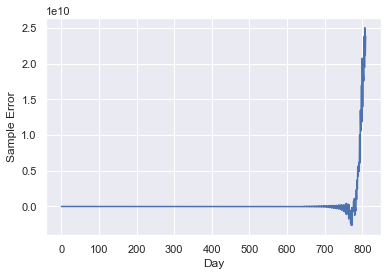

In [29]:
plt.plot(dfB3['days'],YB-YhatB)
plt.xlabel('Day')
plt.ylabel('Sample Error')

# Question 4

In [30]:
df4 = singa.rename({231:'Yt'},axis=1)

In [31]:
df4

,Yt
1/23/20,1
1/24/20,3
1/25/20,3
1/26/20,4
1/27/20,5
...,...
4/7/22,1128155
4/8/22,1132169
4/9/22,1135428
4/10/22,1138001


In [32]:
diffs = df4.Yt.diff()
df4 = df4.assign(Zt = np.where(diffs > 0, 1, np.where(diffs < 0, 0, 0)))
df4.iloc[0,1]=1

In [33]:
df4new = df4.drop(['Yt'],axis=1)
df4new.iloc[0,0]=1
df_log = df4

In [34]:
df4new

,Zt
1/23/20,1
1/24/20,1
1/25/20,0
1/26/20,1
1/27/20,1
...,...
4/7/22,1
4/8/22,1
4/9/22,1
4/10/22,1


In [35]:
for i in range(6):
     df_log['Zt'+'{}'.format(i)]= df4new.shift(i)

In [36]:
df_log = df_log.drop(['Yt','Zt0'],axis=1)
df_log = df_log.fillna(0)

In [42]:
df_log = df_log.iloc[0:6,:]
df_log # data frame for Markovian logit model

,Zt,Zt1,Zt2,Zt3,Zt4,Zt5
1/23/20,1,0.0,0.0,0.0,0.0,0.0
1/24/20,1,1.0,0.0,0.0,0.0,0.0
1/25/20,0,1.0,1.0,0.0,0.0,0.0
1/26/20,1,0.0,1.0,1.0,0.0,0.0
1/27/20,1,1.0,0.0,1.0,1.0,0.0
1/28/20,1,1.0,1.0,0.0,1.0,1.0


In [38]:
X4 = df_log.iloc[:,1:6]
Y4 = df_log.iloc[:,0]

In [43]:
logit = LogisticRegression(fit_intercept=True, penalty='none').fit(X4,Y4)  # fit to logistic regression model

In [44]:
logit.intercept_[0]

16.230478628673186

In [45]:
logit.coef_

array([[ -5.0723832 , -20.50826387,  15.47709784,   9.65288833,
         13.0539341 ]])

## interpret coefficients
The coefficients for the model are -5.0723832, -20.50826387, 15.47709784, 9.65288833 and 13.0539341. 
The coefficient of Zt1 is  -5.0723832 and it means that the estimated expected 5.0723832 decrease in the log odds of a case increase given that cases increased in the previous day holding whether or not it increased the 2, 3, 4, and 5 previous days fixed. 

The coefficient of Zt2 is -20.50826387 and it means the estimated expected 20.50826387 decrease in the log odds of a case increase given that cases increased  n 2 previous days holding whether or not it increased the 1, 3, 4, and 5 previous days fixed.

The coefficient of Zt3 is 15.47709784 and it means that the estimated expected 15.47709784 increase in the log odds of a case increase given that cases increased in 3 previous days holding whether or not it increased the 1, 2, 4, and 5 previous days fixed.

The coefficient of Zt4 is 9.65288833 and it means that the estimated expected 9.65288833 increase in the log odds of a case increase given that cases increased in 4 previous days holding whether or not it increased the 1, 2, 3, and 5 previous days fixed.

The coefficient of Zt5 is 13.0539341 and it means that the estimated expected 13.0539341 increase in the log odds of a case increase given that cases increased in 5 previous days holding whether or not it increased the 1, 2, 3, and 4 previous days fixed.

Intercept is 16.230478628673186 meaning that the estimated log odds of having a case increase is about 16.23 when cases not increased the 1,2,3,4,5 previous days. 